# Find Bounds

In [9]:
import numpy as np

In [2]:
lowest = 20.167           # lowest value  (same for both lat/long in this example)
highest = 101.08          # highest value (same for both lat/long in this example)
resolution = 0.01
N = int((highest+resolution-lowest)/resolution)  # width of grid

target_lat = 50.4
target_lon = 60.37

lyst = np.arange(lowest, highest+resolution, resolution)  # helper list to make lat/lon grids
print('N =', N)
print('lyst =', lyst)
print(len(lyst))

N = 8092
lyst = [ 20.167  20.177  20.187 ... 101.067 101.077 101.087]
8093


In [3]:
nav_lon = [lyst for i in range(N)]
print(nav_lon[5])

[ 20.167  20.177  20.187 ... 101.067 101.077 101.087]


In [4]:
nav_lat = [np.full_like(lyst,lyst[i]) for i in range(N)]
print(nav_lat[-1])

[101.077 101.077 101.077 ... 101.077 101.077 101.077]


In [5]:
# longitudinal bounds
lb_lon = int((target_lon - lowest)/resolution)
ub_lon = lb_lon+1
print('index of lon lower bound =', lb_lon)
print('index of lon upper bound =', ub_lon)

# latitudinal bounds
lb_lat = int((target_lat - lowest)/resolution)
ub_lat = lb_lat+1
print('index of lat lower bound =', lb_lat)
print('index of lat upper bound =', ub_lat)

index of lon lower bound = 4020
index of lon upper bound = 4021
index of lat lower bound = 3023
index of lat upper bound = 3024


In [6]:
print('target =', target_lon)
print('lon lower bound =', nav_lon[lb_lat][lb_lon])
print('lon upper bound =', nav_lon[ub_lat][ub_lon])

target = 60.37
lon lower bound = 60.367000000006286
lon upper bound = 60.37700000000629


In [7]:
print('target =', target_lat)
print('lat lower bound =', nav_lat[lb_lat][lb_lon])
print('lat upper bound =', nav_lat[ub_lat][ub_lon])

target = 50.4
lat lower bound = 50.397000000004724
lat upper bound = 50.40700000000473


# Interpolation

[[ 0  5]
 [ 0 10]]
W2s = 0.8 0.2
value should be: 4.8
interpolated value: 4.800000000000001


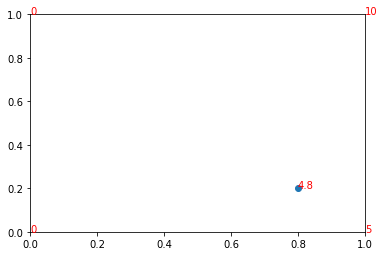

In [8]:
from matplotlib import pyplot as plt

grid = np.array([[0, 5], [0, 10]])  # actual values
print(grid)
nav_res = 1.0       # resolution of grid
target_lon = 0.8
target_lat = 0.2
lowest_lon = 0.0
lowest_lat = 0.0

x = (target_lon - lowest_lon)%nav_res  # W2 lon
y = (target_lat - lowest_lat)%nav_res  # W2 lat
print('W2s =', x, y)

interpolated = grid[0,0]*(1-x)*(1-y) + grid[0,1]*x*(1-y) + grid[1,0]*(1-x)*y + grid[1,1]*x*y
print('value should be: 4.8')
print('interpolated value:', interpolated)

# Plot values on grid
plt.figure()
plt.scatter(target_lon, target_lat)
plt.annotate('5', (1,0), color='r')
plt.annotate('10', (1,1), color='r')
plt.annotate('0', (0,1), color='r')
plt.annotate('0', (0,0), color='r')
plt.annotate(str(np.round(interpolated, decimals=1)), (target_lon, target_lat), color='r')
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()